##### 02-1.훈련 세트와 테스트 세트

#지도 학습과 비지도 학습
#데이터와 정답(입력과 타킷) => 훈련 데이터
#평가에 사용하는 데이터를 "테스트 세트"
#훈련에 사용되는 데이터를 "훈련 세트"



In [26]:
## 35마리의 도미 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 14마리의 빙어 데이터

fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#인덱스 지정
print(fish_data[4])

#슬라이싱
print(fish_data[0:5])
print(fish_data[:5])
print(fish_data[44:])

#⭐p7 슬라이싱 연산으로 훈련 세트 및 테스트 세트 생성
#⭐⭐훈련세트에 fit()으로 모델 훈련, 테스트세트에 score()으로 평가
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

#⭐⭐⭐정확도가 0.0 나옴
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


0.0

In [27]:
#🌱샘플링 편향: 훈련세트와 테스트 세트를 골고루 섞어 나누기
#🌱넘파이numpy: 파이썬의 대표적인 배열array 라이브러리로서 고차원의 배열을 만들고 조작하게 함
#Array에서 차원은 좌표계의 축과 같음

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape) #⬅(샘플 수, 특성 수) 출력



[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [28]:
#🌱넘파이 배열에서 훈련 및 테스트 세트 랜덤으로 만들기 
#단, input_arr와 target_arr에서 같은 위치여야 함
#아예 인덱스를 섞은 후 input_arr와 target_arr에서 샘플을 선택-> 무작위로 훈련 세트로 나누게 됨

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

#arange() : 정수 N을 전달하면 0 ~ N-1까지 1씩 증가
#shuffle() : 주어진 배열을 무작위로 섞음
#넘파이는 슬라이싱 외 배열 인덱싱 기능 제공 ; 여러 개의 인덱스로 한 번에 여러개 원소 선택

print(input_arr[[1,3]])

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 26.3 290. ]
 [ 29.  363. ]]


In [29]:
#index 배열 처음 35개로 35개 샘플을 랜덤하게 훈련 세트로 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

#index 첫번째 값은 13, train_input의 첫번째 원소는 input_arr의 14번째 원소
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


<function matplotlib.pyplot.show(close=None, block=None)>

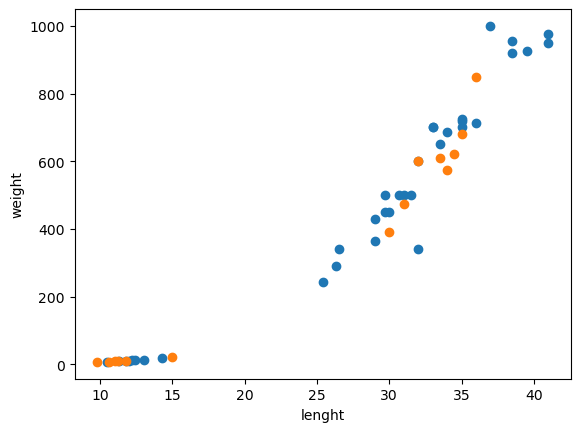

In [30]:
#나머지 14개 테스트 세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


#잘 섞인 훈련 세트와 테스트 세트 산점도
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show


두 번째 머신러닝 프로그램

fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버리게 된다.
이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다. 여기에서는 단순하게 이전에 만든 kn 객체를 그대로 사용

In [31]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# predict() 메서드로 테스트 세트의 예측 결과 및 실제 타깃 확인

kn.predict(test_input)
test_target

#predic메서드 출력 결과와 test_target의 출력과 동일하게 array로 감싸 있음
#이는 넘파이 배열을 의미,,,,,,,,


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

훈련 모델 평가 p16
##### 다차원 배열 라이브러리 넘파이를 통해 고차원의 큰 배열을 제공

마무리 p20
##### 지도 학습
    입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는 데 활용 
    ex. k-최근접 이웃
##### 비지도 학습
    타깃 데이터가 없음. 따라서 무엇을 예측하는 것이 아니라 입력 데이터에서 어떤 패턴을 찾는 데 주로 활용
##### 훈련 세트
    모델을 훈련할 때 사용하는 데이터. 보통 훈련 세트가 클수록 좋음
    따라서 테스트 세트를 제외한 모든 데이터를 사용
##### 테스트 세트
    전체 데이터에서 20~30%를 테스트 세트로 사용하는 경우가 많음
    전체 데이터가 아주 크다면 1%만 덜어내도 충분할 수 있음

numpy
##### seed()
    넘파이에서 난수를 생성하기 위한 정수 초깃값을 지정
    초깃값이 같으면 동일한 난수를 뽑을 수 있음
    따라서 랜덤 함수의 결과를 동일하게 재현하고 싶을 때 사용
##### arang()
    일정한 간격의 정수 또는 실수 배열을 만듦 기본 간격은 1
    매개변수가 하나이면 종료 숫자를 의미
    0에서 종료 숫자까지 배열을 만듦. 종료 숫자는 배열에 포함되지 않음
##### shuffle()
    주어진 배열을 랜덤하게 섞음
    다차원 배열일 경우 첫 번째 축(행)에 대해서만 섞음

In [44]:
print(np.arange(3))

print(np.arange(1, 3))

print(np.arange(1, 3, 0.2))

arr = np.array([[1, 2], [3, 4], [5, 6]])
np.random.shuffle(arr)
print(arr)

[0 1 2]
[1 2]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
[[5 6]
 [1 2]
 [3 4]]


# 02-2 데이터 전처리



In [47]:
# 넘파이로 데이터 준비하기

import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

## ⬆ [1,2,3] 과 [4,5,6] 두 리스트를 일렬로 세운 후 나란히 옆으로 붙힘
# (3,2)크기의 배열_3개의 행 2개의 열

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 타깃 데이터 
# np.ones ()와 np.zeros() 이 두 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 줌

print(np.ones(5))

# 이 두 함수를 사용해 1 이 35개인 배열과 0이 14개인 배열을 간단히 만들 수 있다.




[1. 1. 1. 1. 1.]


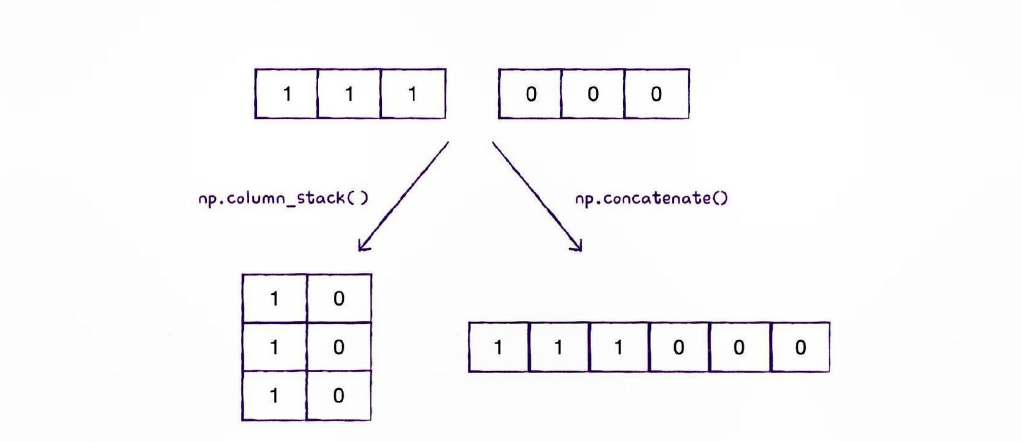

In [50]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


##### 사이킷런으로 훈련 세트와 테스트 세트 나누기

train_test_split() 함수는 사이킷런의 model_selction 모듈 아해에 있음
train_test_split() 함수는 자체적 랜덤 시드를 지정할 수 있는 random_state 매개변수 있음

In [56]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

#train_test_split 함수는 테스트 세트를 기본적으로 25% 할당

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)


(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


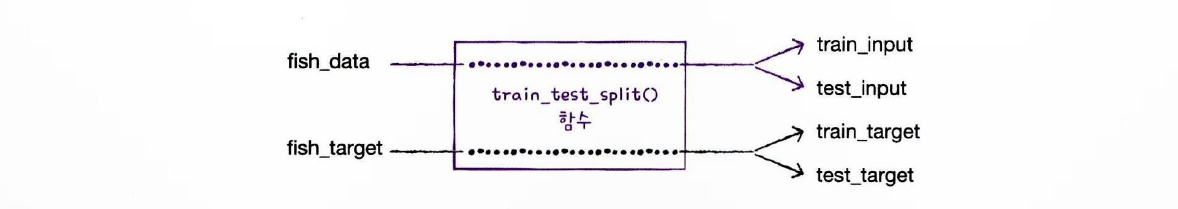

In [57]:
#train_test_split 함수에서 stratify 매개변수에 타깃 데이터를 전달하여
#클래스 비율에 맞게 데이터를 나누어 주어 샘플링 편향 예방

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)



[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


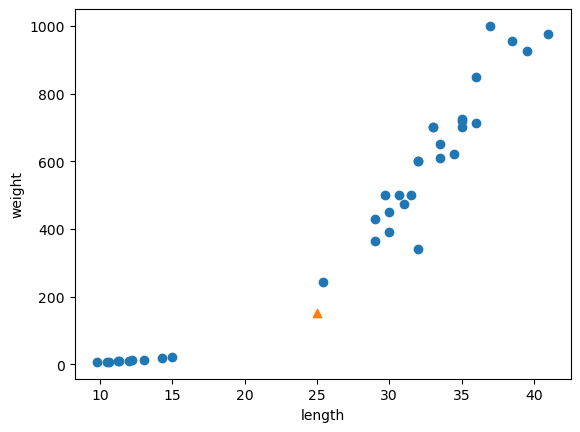

In [59]:
# 수상한 도미 한 마리

import matplotlib.pyplot as pit
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정합니다
pit.xlabel ('length')
plt.ylabel('weight')
plt.show()


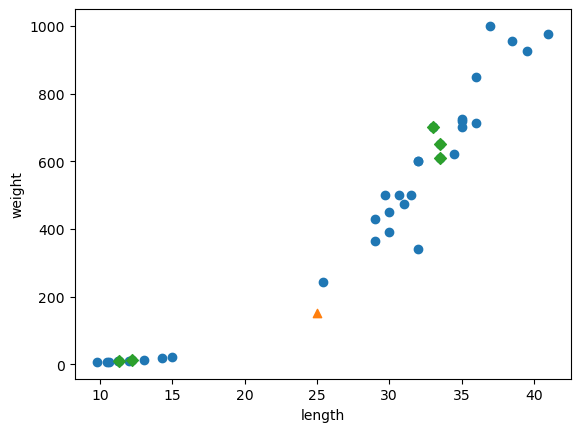

[[[ 33.5 610. ]
  [ 33.  700. ]
  [ 12.2  12.2]
  [ 33.5 650. ]
  [ 11.3   8.7]]]
[[1. 1. 0. 1. 0.]]


In [63]:
#샘플은 오른쪽 위로 뻗어 있는 도미 데이터에 더 가까운데 왜 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한 걸까?

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') 
pit.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
pit.xlabel ('length')
plt.ylabel('weight')
plt.show()

##indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분
#marker=’D’로 지정하면 산점도를 마름모로
#삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시

print(train_input[indexes])
#가장 가까운 이웃에 도미가 하나, 나머지 4개의 샘플은 모두 빙어

print(train_target[indexes])

In [64]:
#왜 가까운 이웃을 빙어라고 생각?(산점도에서 도미와 가까워 보이는데도!)
#kneighbors() 메서드에서 반환한 distances 배열을 출력
#이 배열에는 이웃 샘플까지 거리

print(distances)


[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


In [ ]:
#p33 기준을 맞춰라!

#x축과 y축의 범위를 동일하게 맞추었더니 모든 데이터가 수직으로 늘어선 형태
#（x축）는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못 함
# 오로지 생선의 무게 （y축）만 고려 대상

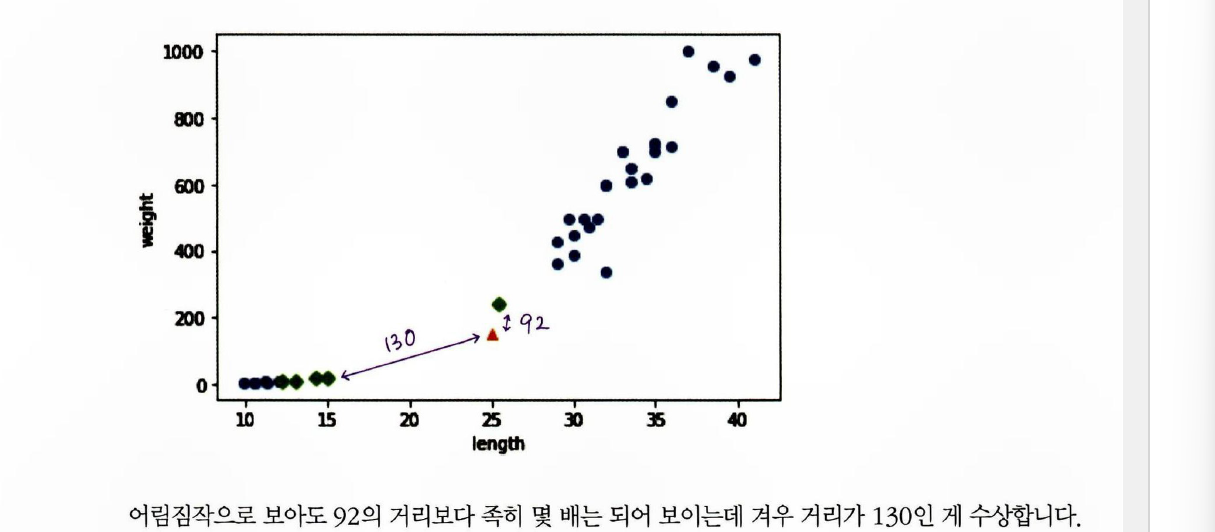

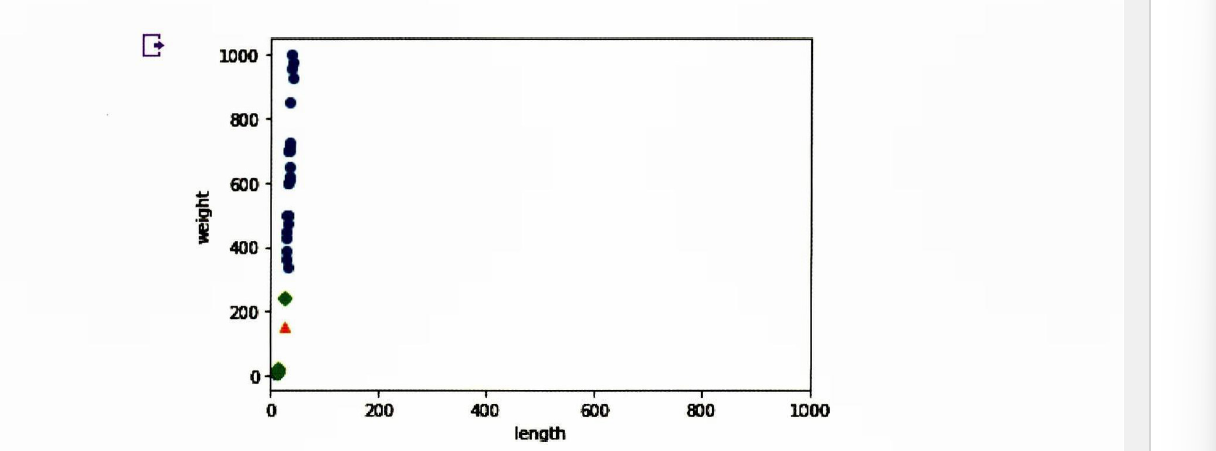

# 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.
+ 특히 알고리즘이 거리 기반일 때
예. k-최근접 이웃도 포함

제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 함
이런 작업을 데이터 전처리 data preprocessing

가장 널리 사용하는 전처리 방법
# 표준점수 standard score
+ 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지
+ 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능



In [66]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


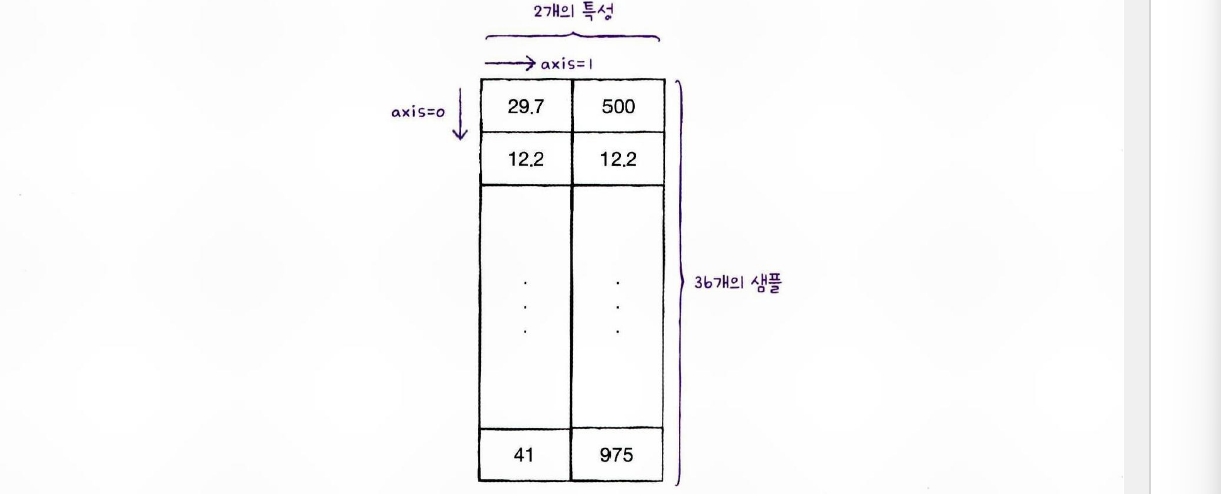

In [68]:
# 브로드캐스팅 : 넘파이 배열 사이에서 일어남
# trainjnput, mean, std가 모두 넘파이 배열

# train_input의 모든 행에서 mean에 있는 두 평균값을 빼줌
# 그다음 std에 있는 두 표준편차를 다시 모든 행에 적용

train_scaled = (train_input - mean) / std
print(train_scaled)


[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


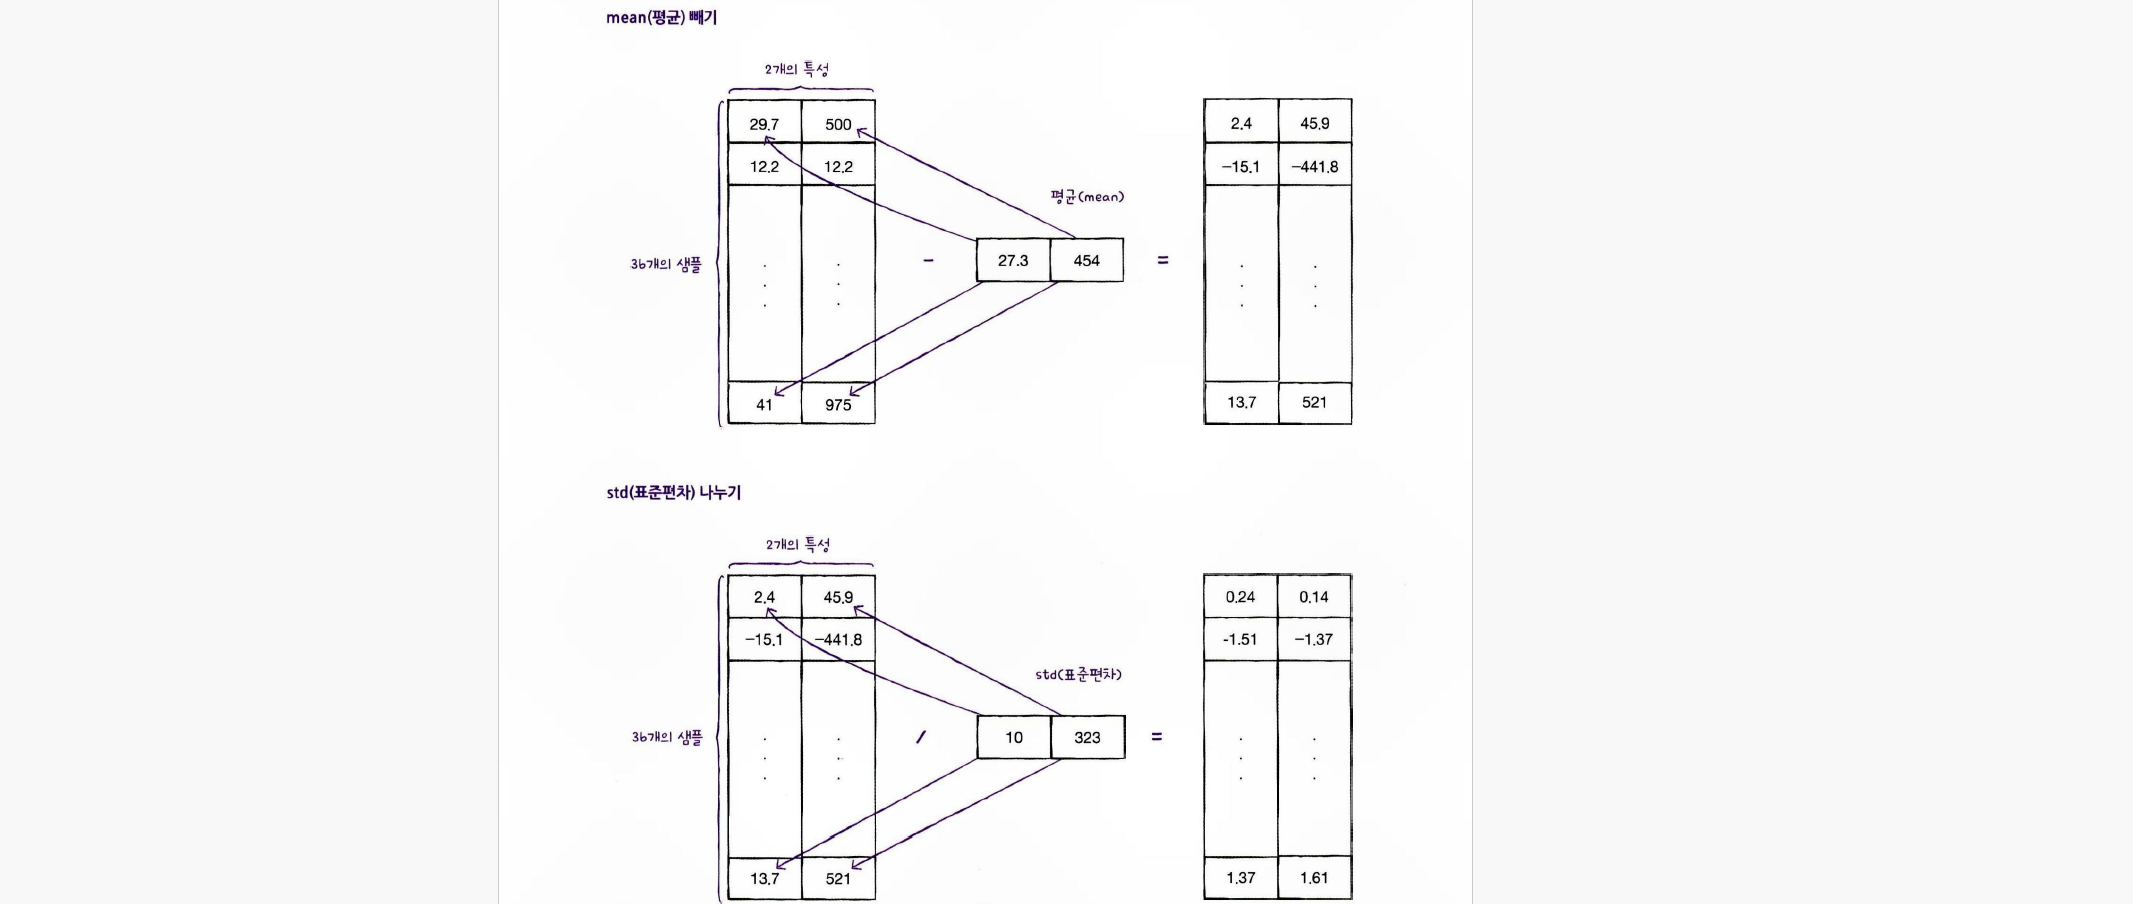

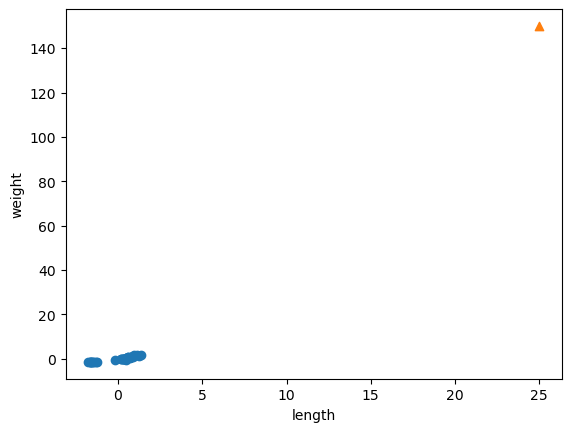

In [ ]:
#전처리 데이터로 모델 훈련

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


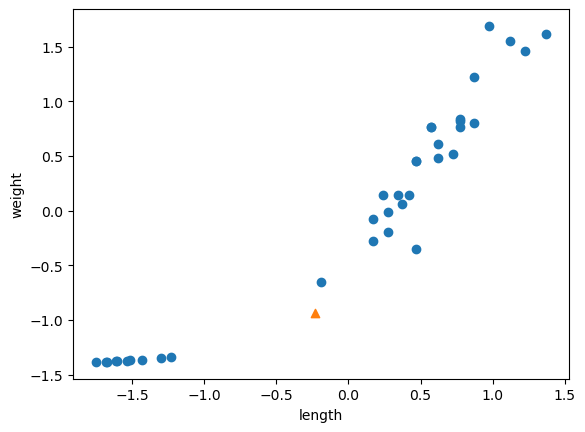

In [71]:
#훈련 세트의 mean, std를 이용해서 변환해야 함
#즉, 샘플[25,150]을 동일한 비율로 변환해야 함

new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준편차로 변환하기 전 산점도와 거의 동일 그러나
# x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것


In [ ]:
# 테스트 세트도 훈련 세트의 평균과 표준편차로 변환
# (즉, 샘플 및 테스트 세트)

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))
#⬆ 도미로 예측[1.]

[1.]


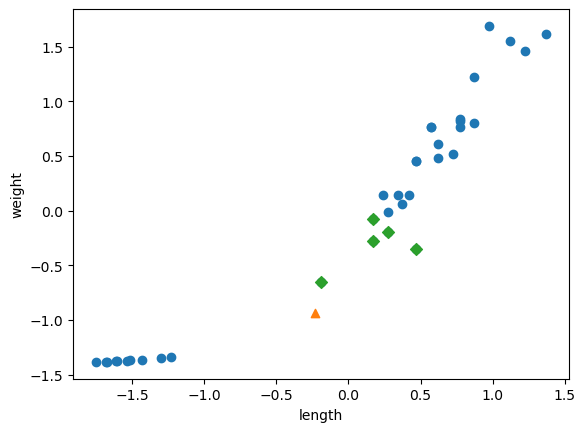

In [75]:
# 마지막으로 kneighbors()함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도
#--현재, 특성을 표준점수로 바꾸었기 때문에 가까운 이웃에 변화 가능

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

스케일이 다른 특성 처리

문제
    길이와 무게의 단위 스케일이 크게 달라 모델이 무게에 치우쳐 오분류가 발생
    특히 k-NN처럼 거리 기반 알고리즘은 스케일 차이에 매우 민감
해결
    두 특성을 표준점수(z-score)로 변환해 동일한 기준으로 비교 가능하도록 만듦
    스케일 변환은 반드시 훈련 세트 기준으로 계산한 평균·표준편차를 테스트 세트에도 동일하게 적용

    전처리를 일관되게 적용해 잘못된 예측 문제가 해결

